![example](images/1_DywgVk0WQX66Io_boucHwA.jpeg)

# Factors That Determine a Successful Film

**Authors:** Warren Morelli


## Overview

In this project, I analysed a wide range of film databases from various sources (Bom, IMDb, etc), to come up with an understanding of what factors make a film successful and I have translated that into an actionable plan to help the decision-makers at Microsoft decide what type of film to create. 

After analysing the data, I came to the conclusion that the 3 main factors that determine whether a movie is successful are genre, release month and film runtime. Here are a couple of main points from my findings below:

Adventure is the genre that produces the most revenue, followed by action and sci-fi. 
Movies released in June-July and November-December are more successful, most likely due to the school holidays. 
And movies with a runtime of 90 - 150 minutes have the greatest success.


## Business Problem

Microsoft wants to get the most out of their investment in the movie industry. In order for them to achieve this, I have been tasked with determining the three most recommendations on what type of films they should create. The following Questions were addressed:

1- What are the most crucial factors that determine whether a movie is most profitable?

2- Is there enough data to be able to anaylise these factors

3- What are the most successful genres?

4- What is the ideal runtime for a profitable film?

5- Which months are films the most successful?


## Data 
The films revenues came from bom.movie_gross.csv.gz. This was connected to imdb.title.basics.csv.gz and tmdb.movies.csv.gz to compare the average revenue with the average runtimes, release dates and genres, as I found these 3 to be the most benefical factors for a succesful film.


In [1]:
import pandas as pd
df1 = pd.read_csv("zippedData/bom.movie_gross.csv.gz") #gross
df2 = pd.read_csv("zippedData/imdb.title.basics.csv.gz") #run_minutes & genre
df3 = pd.read_csv("zippedData/tmdb.movies.csv.gz") #language

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df1 = pd.read_csv("zippedData/bom.movie_gross.csv.gz") #gross
df2 = pd.read_csv("zippedData/imdb.title.basics.csv.gz") #run_minutes & genre
df3 = pd.read_csv("zippedData/tmdb.movies.csv.gz") #language

I first started by dropping all of the variables that I thought wouldn’t effect the end result, producing the most revenue. A couple of the rows in my dataset were missing values. Luckily, I had a very large data base so I could afford to drop those one where need be. 

I added the domestic gross and forign gross together to find the total gross so I could compare that to the months, genres and runtime. There were quite a few missing runtime data values, too many to delete, so I found if I changed those missing values to the median, it didn’t effect the outcome and I wouldn’t lose data.

## Data Cleaning
First thing I had to do was clean the 3 data sets that contained the data that I needed before I could do any analysis.

DF1 Data Cleaning

In [2]:
#First I drop columns I don't need
df1.drop('studio', inplace=True, axis=1)
df1.drop('year', inplace=True, axis=1)

#Some films didn't make revenue internationally so the foreign gross values were listed as NaN so I had to change them to 0
df1['foreign_gross'] = df1['foreign_gross'].fillna('0')

# I will delete Null rows for domestic_gross because there aren't that many so I won't lose much data.
df1 = df1.dropna(subset=['domestic_gross'])

#In forign goss, the values were strings so it had to be changed to int. Some values had commas so I had to remove them before I could convert it.
df1['foreign_gross'] = df1['foreign_gross'].str.replace(",","")
df1[df1['foreign_gross'].str.contains(',')] #double check to make sure it worked

#change foreign_gross to float, then int
df1['foreign_gross'] = df1['foreign_gross'].astype('float')
df1['domestic_gross'] = df1['domestic_gross'].astype('float')
df1['foreign_gross'] = df1['foreign_gross'].astype('int')
df1['domestic_gross'] = df1['domestic_gross'].astype('int')

#Create a new row with total gross
df1['gross'] = df1['domestic_gross'] + df1['foreign_gross']

#drop 2 rows. I only need total gross.
df1.drop('domestic_gross', inplace=True, axis=1)
df1.drop('foreign_gross', inplace=True, axis=1)

DF2 Data Cleaning

In [3]:
#drop columns I don't need
df2.drop('original_title', inplace=True, axis=1)
df2.drop('start_year', inplace=True, axis=1)

#I thought the movies that ran for 1 minutes or over 10 hours where a mistake, but after checking online, it is correct.
df2.loc[df2['runtime_minutes'] < 2].head()

#I will change missing runtime values to median as there are too many to delete. Changing them to the median allows me to keep the most data and not have too much noise.
df2['runtime_minutes'] = df2['runtime_minutes'].fillna(df2['runtime_minutes'].median())

# delete Null genres as it is a small percentage of total data
df2 = df2.dropna(subset=['genres'])

# change heading to title so I can join data
df2 = df2.rename({'primary_title': 'title'}, axis=1) 

#runtime is a string so I have to change it to int for data analysis
df2['runtime_minutes'] = df2['runtime_minutes'].astype(int)

#The first genre in the list is the most relatable so we will use that. first I have to split the genres.
df2['genres'] = df2['genres'].map(lambda x: str(x).split(',')) #fisrt split the genres
df2['genres'] = df2['genres'].map(lambda x: x[0:1]) #then select the first
#then convert back to string
def listToString(s): 
    str1 = " "
    return (str1.join(s))
df2['genres'] = df2['genres'].map(lambda x: listToString(x))

df2['genres'].unique()

array(['Action', 'Biography', 'Drama', 'Comedy', 'Horror', 'Adventure',
       'Documentary', 'History', 'Animation', 'Crime', 'Sci-Fi',
       'Thriller', 'Fantasy', 'Mystery', 'Musical', 'Family', 'Western',
       'Romance', 'Sport', 'Adult', 'Music', 'News', 'Talk-Show',
       'Reality-TV', 'War', 'Game-Show', 'Short'], dtype=object)

DF3 Data Cleaning

In [4]:
#drop columns I don't need
df3.drop('genre_ids', inplace=True, axis=1)
df3.drop('Unnamed: 0', inplace=True, axis=1)
df3.drop('original_title', inplace=True, axis=1)
df3.drop('id', inplace=True, axis=1)
df3.drop('original_language', inplace=True, axis=1)
df3.drop('vote_average', inplace=True, axis=1)
df3.drop('vote_count', inplace=True, axis=1)

#I want only need the month from the date. It is a string to I will take the month section from that.
df3['release_month'] = df3['release_date'].str[5:7]

#Then change that from month number to actual name
df3['release_month'] = df3['release_month'].str.replace("01","jan")
df3['release_month'] = df3['release_month'].str.replace("02","feb")
df3['release_month'] = df3['release_month'].str.replace("03","mar")
df3['release_month'] = df3['release_month'].str.replace("04","apr")
df3['release_month'] = df3['release_month'].str.replace("05","may")
df3['release_month'] = df3['release_month'].str.replace("06","jun")
df3['release_month'] = df3['release_month'].str.replace("07","jul")
df3['release_month'] = df3['release_month'].str.replace("08","aug")
df3['release_month'] = df3['release_month'].str.replace("09","sep")
df3['release_month'] = df3['release_month'].str.replace("10","oct")
df3['release_month'] = df3['release_month'].str.replace("11","nov")
df3['release_month'] = df3['release_month'].str.replace("12","dec")

#Now I can delete the old column
df3.drop('release_date', inplace=True, axis=1)

The clean data

In [5]:
df1.head()

,title,gross
0,Toy Story 3,1067000000
1,Alice in Wonderland (2010),1025500000
2,Harry Potter and the Deathly Hallows Part 1,960300000
3,Inception,828300000
4,Shrek Forever After,752600000


In [6]:
df2.head()

,tconst,title,runtime_minutes,genres
0,tt0063540,Sunghursh,175,Action
1,tt0066787,One Day Before the Rainy Season,114,Biography
2,tt0069049,The Other Side of the Wind,122,Drama
3,tt0069204,Sabse Bada Sukh,87,Comedy
4,tt0100275,The Wandering Soap Opera,80,Comedy


In [7]:
df3.head()

,popularity,title,release_month
0,33.533,Harry Potter and the Deathly Hallows: Part 1,nov
1,28.734,How to Train Your Dragon,mar
2,28.515,Iron Man 2,may
3,28.005,Toy Story,nov
4,27.920,Inception,jul


## Data Merging
After my data was cleaned, I could then join my data frames by the matching titles so I can compare my chosen factors to the total revenue


In [8]:
#I will only create one table at a time as too lose as little data as possile, rather than joining all 3
df_genres_runtime = pd.merge(df1, df2, how="inner", indicator=True)
df_month = pd.merge(df1, df3, how="inner", indicator=True)

## Data Modeling
Now that I have all of my Data cleaned and in new data fames, it is ready to analyze. The 3 major factors that I decided to analize were genres, runtime and release month as these 3 most likely had the most direct impact on revenue.


## #1 Analyzing Genres
I had to find the mean revenue of each genre so I can determain which ones are the most profitable. See the results below.

In [9]:
#Create a new data frame grouped by genres and showing mean values so I can create a bar chat to analyize the results.
df_genres_mean = df_genres_runtime.groupby(by='genres').mean()
df_genres_mean = df_genres_mean.reset_index()
df_genres_mean.head(3)

,genres,gross,runtime_minutes
0,Action,1.632312e+08,114.493921
1,Adventure,2.074807e+08,102.211009
2,Animation,9.606703e+07,90.097561


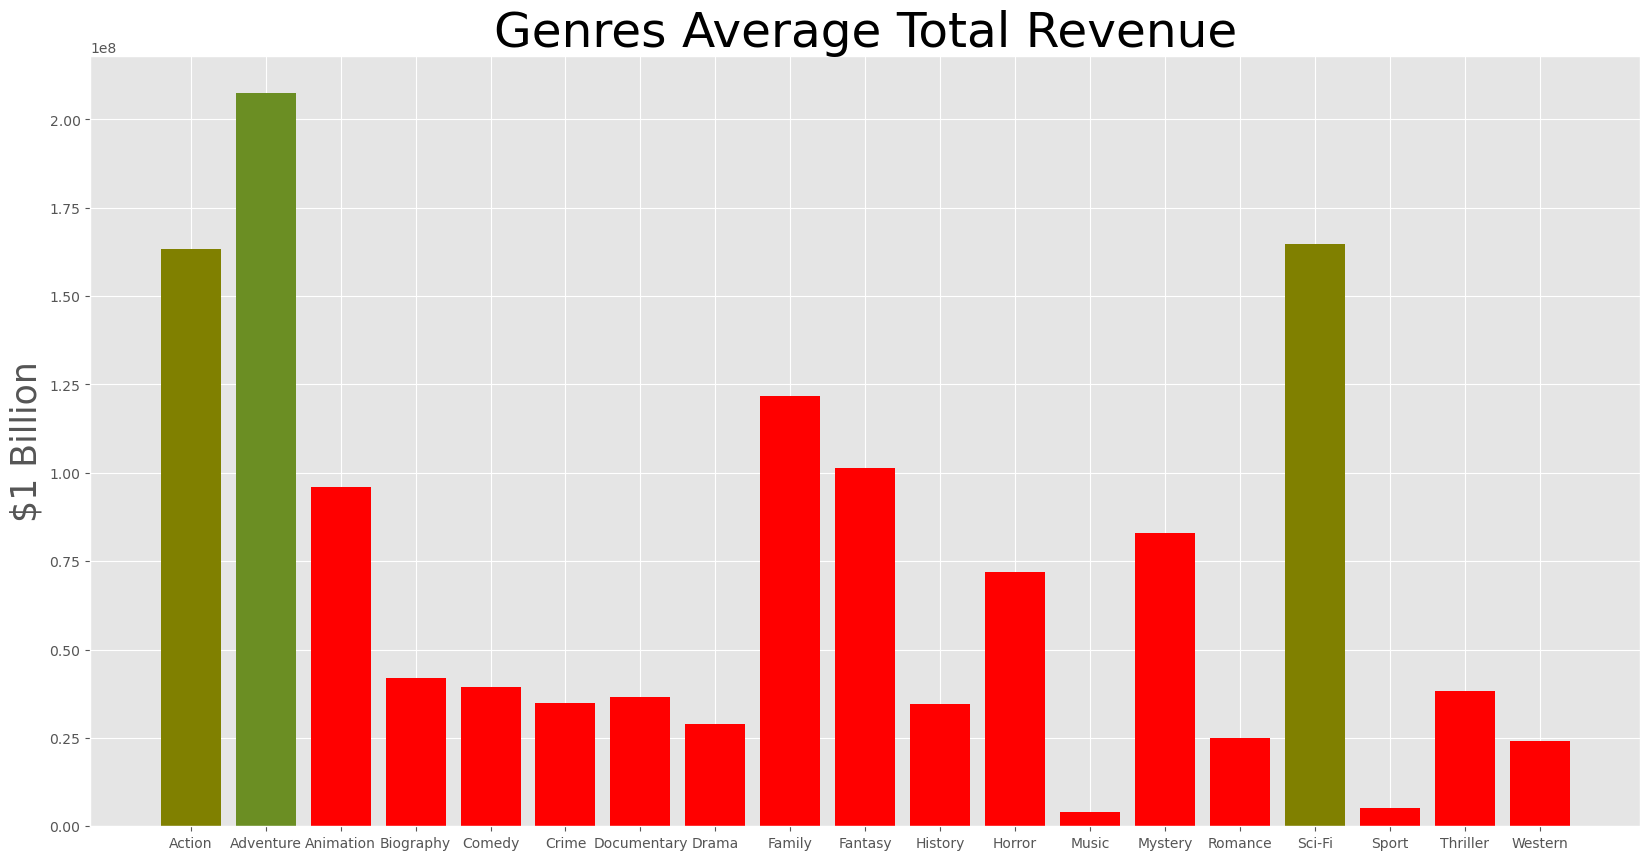

In [10]:
#show findings in a bar graph
plt.figure(figsize=(20,10))
x=df_genres_mean['genres']
y=df_genres_mean['gross']
plt.bar(x, y, color=['olive', 'olivedrab', 'red', 'red', 'red','red', 'red', 'red', 'red', 'red','red','red', 'red', 'red', 'red', 'olive', 'red', 'red', 'red'],)
plt.ylabel('$1 Billion', fontsize=25)
plt.title('Genres Average Total Revenue', fontsize=35);

## #2 Analyzing Runtime
In order to determain the ideal runtime for a film, I had to group runtimes and gross by groups and the calculate the mean so I could compare them. See the results below.

In [11]:
#create a group by runtime mean so I can compare runtime mean to gross revenue mean
df_runtime_mean = df_genres_runtime.groupby(by='runtime_minutes').mean()
df_runtime_mean = df_runtime_mean.reset_index()
df_runtime_mean.head(3)

,runtime_minutes,gross
0,2,177000.0
1,3,91750000.0
2,4,101200000.0


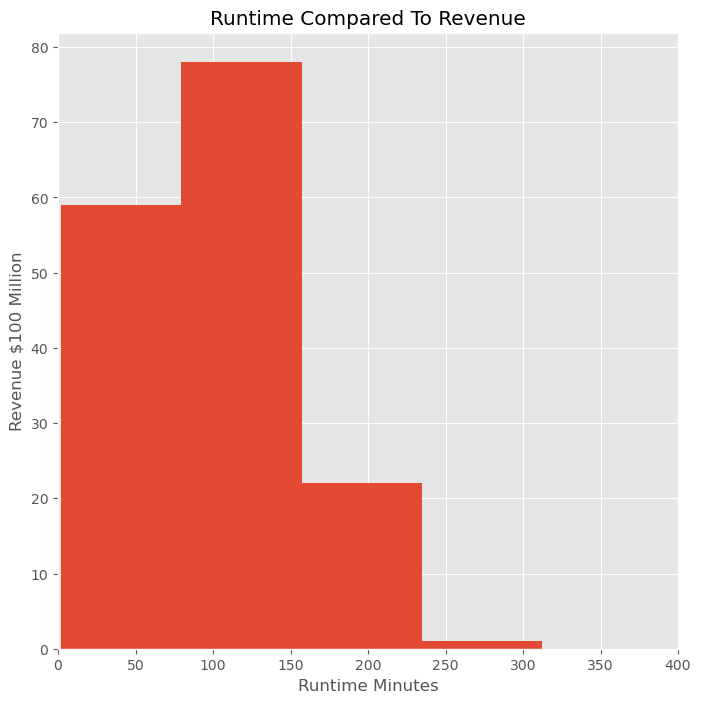

In [41]:
#Show results in a Histogram to analyize results
x = df_runtime_mean['runtime_minutes']
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(x, bins=8)
ax.set_xlim(0, 400)
#ax.set_ylim(0, 35)
ax.set_xlabel("Runtime Minutes")
ax.set_ylabel("Revenue $100 Million")
ax.set_title("Runtime Compared To Revenue");

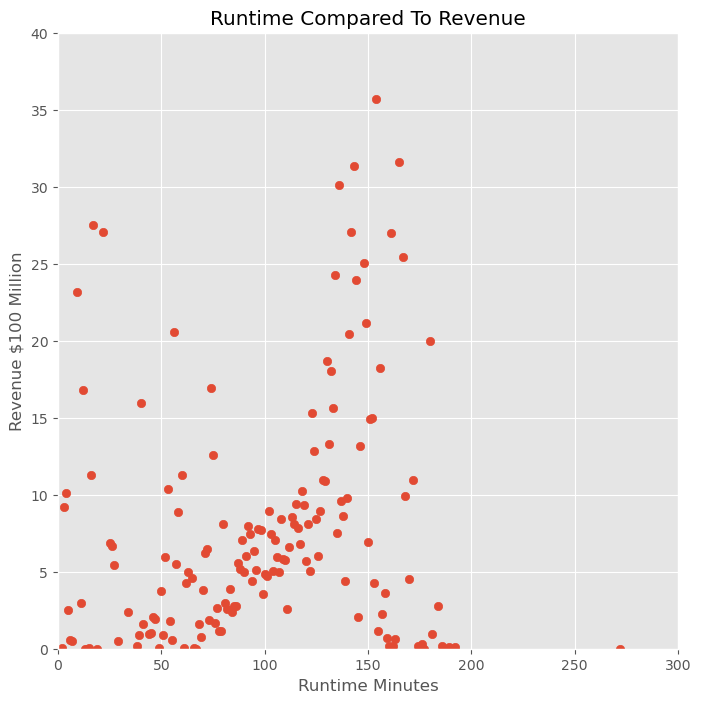

In [36]:
#I also created a scatterplot to verify and further analize the resutls
q = df_runtime_mean['runtime_minutes']
w = df_runtime_mean['gross']
w = w/10000000 #make it more readable
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(q, w)
ax.set_xlim(0, 300)
ax.set_ylim(0, 40)
ax.set_xlabel("Runtime Minutes")
ax.set_ylabel("Revenue $100 Million")
ax.set_title("Runtime Compared To Revenue");

## #3 Analyzing Months
In order to determain the most profitable months, I had to group the data by months and then find the mean profit for each month. See the restuls below.

In [14]:
#create a group by months so I can compare each month to gross revenue mean
df_month = df_month.groupby(by='release_month').mean()
df_month = df_month.reset_index()
df_month['gross'] = df_month['gross'].map(lambda x: x/1000)

df_month = df_month.reindex([4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])
df_month.head(3)

,release_month,gross,popularity
4,jan,60466.778595,8.405561
3,feb,93593.732503,10.153405
7,mar,65984.291808,9.089231


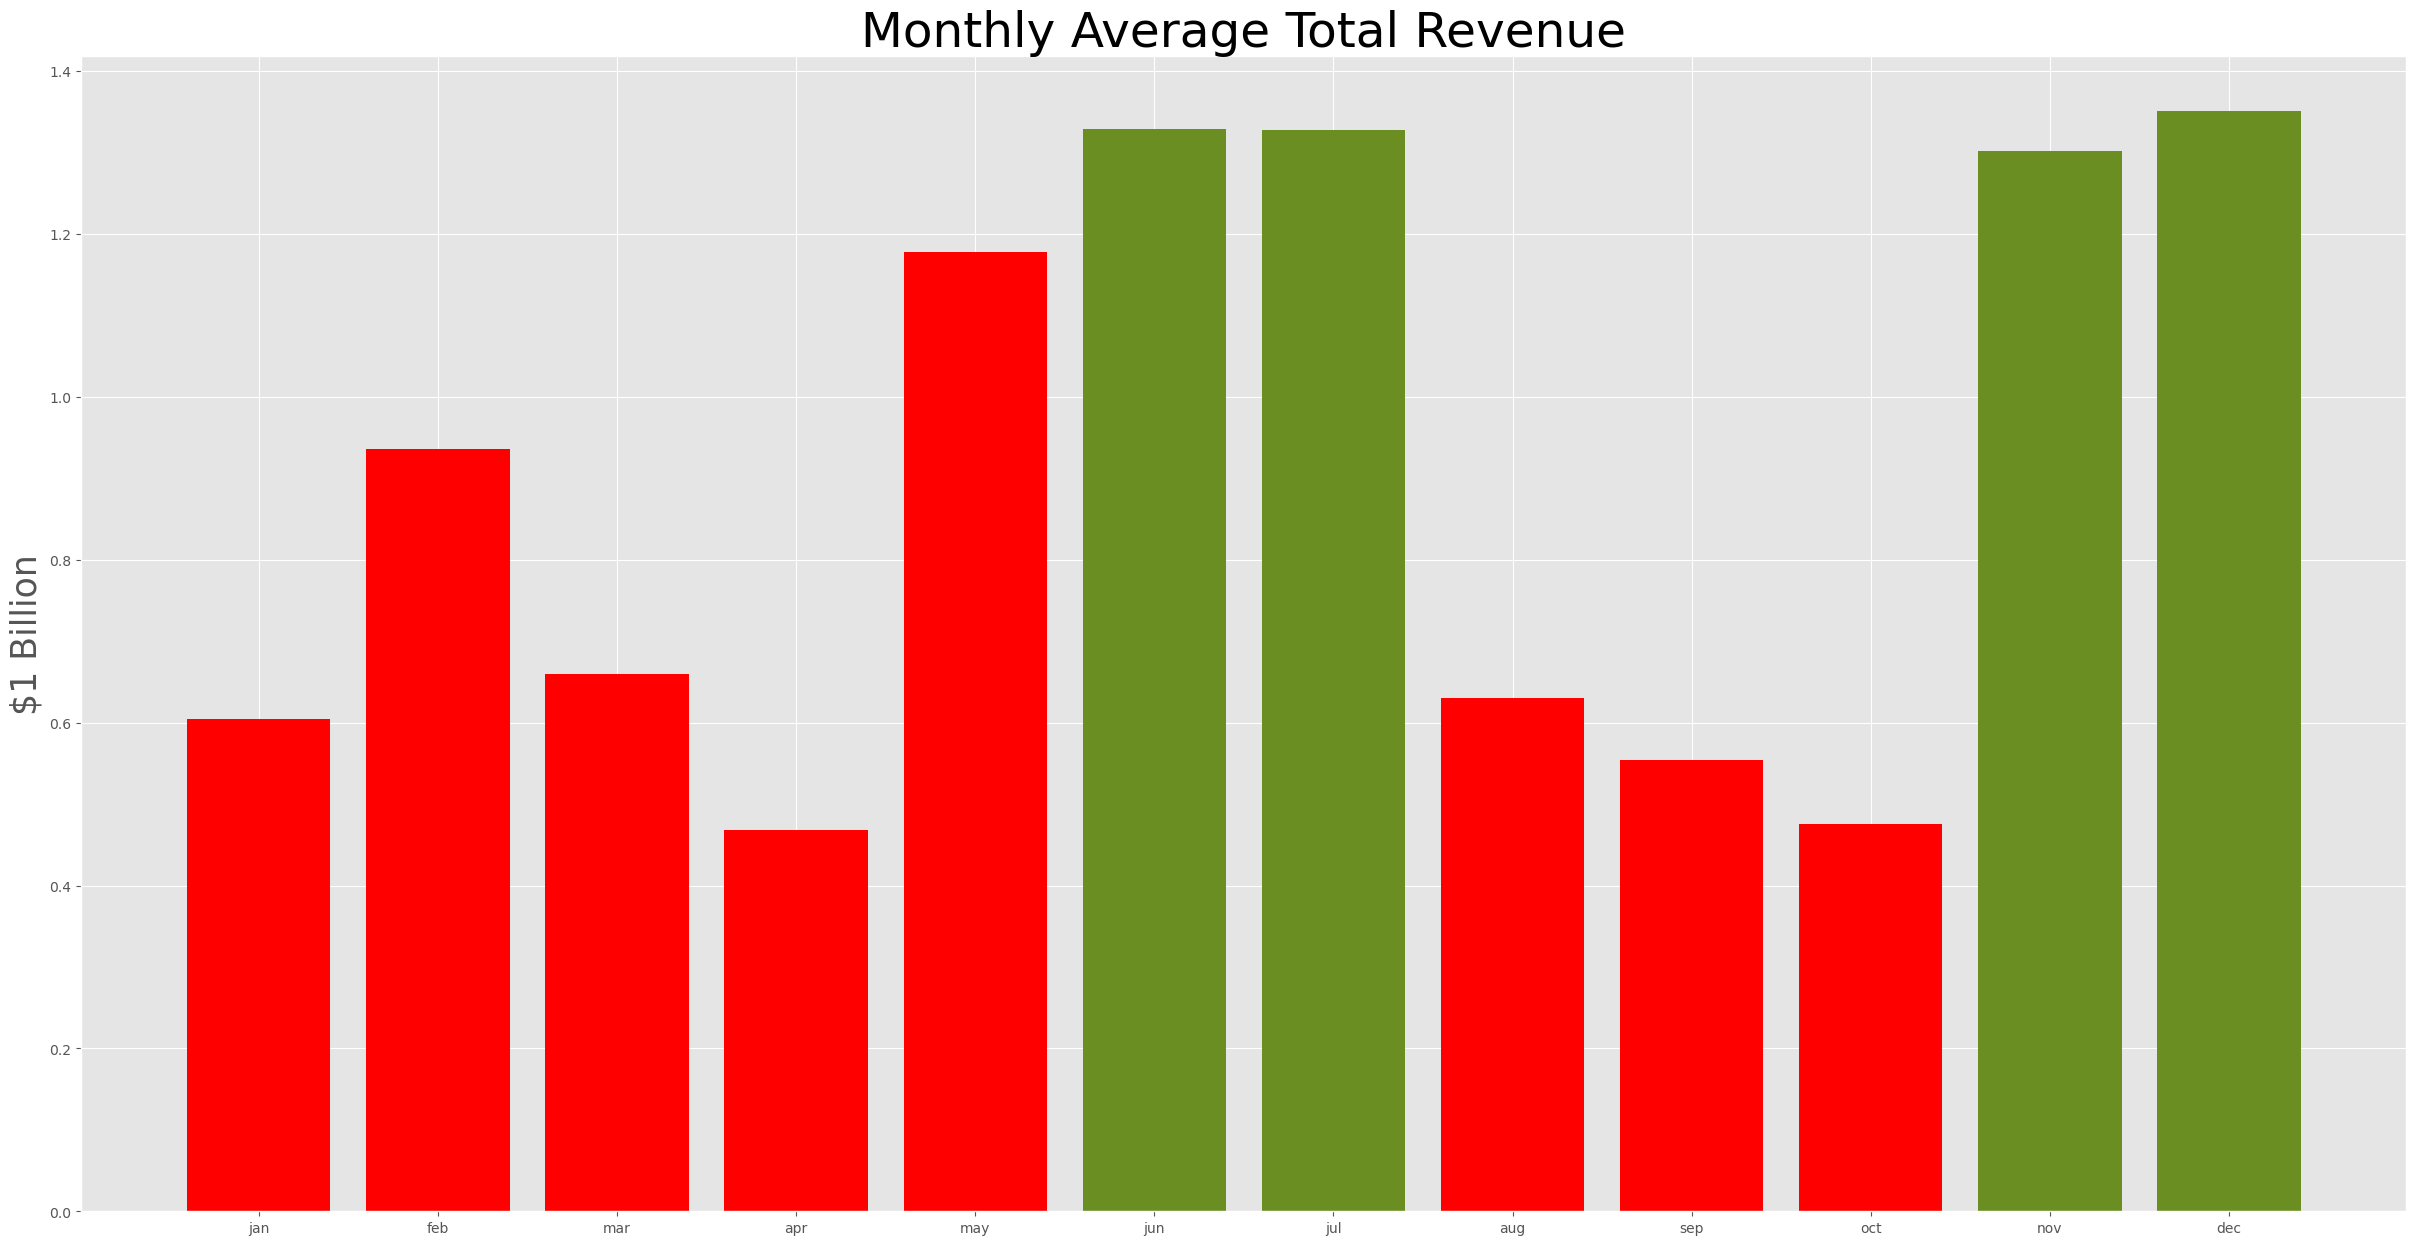

In [15]:
#show findings in a bar graph to analyize results
plt.figure(figsize=(30,15))
x=df_month['release_month']
df_month['gross'] = df_month['gross']/100000
y=df_month['gross']
plt.bar(x, y, color=['red', 'red', 'red', 'red', 'red','olivedrab', 'olivedrab', 'red', 'red','red', 'olivedrab', 'olivedrab'])
plt.ylabel('$1 Billion', fontsize=25)
plt.title('Monthly Average Total Revenue', fontsize=35);

## Conclusions
My above analysis leads me to 3 clear reccommendations I can confidenly provide that will produce the most profitable film

1. Choose one of these 3 genres are the best performers. Adventure is the leader closely followed by Action and Sci-Fi.

2. The ideal runtime for a film is between 90 - 150 minutes.

3. The months that generate the most revenue are June-July and November-December. These dates seem to aligm with 2 biggest school holidays of the year which could explain the increase in revenue.

***

Further anaylsis to compare profit margins with revenue could uncover more factors to determine successful films.    